In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('D://test/1/movie_bd_v5.xls')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
8,tt2293640,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,6.5,2015
1351,tt0366627,29000000,21126225,The Jacket,Adrien Brody|Keira Knightley|Kris Kristofferso...,John Maybury,Terror has a new name.,A military veteran goes on a journey into the ...,103,Drama|Mystery|Thriller|Fantasy,Section Eight|Mandalay Pictures|VIP 3 Medienfo...,3/4/2005,6.6,2005
1006,tt1611224,69000000,112265139,Abraham Lincoln: Vampire Hunter,Benjamin Walker|Dominic Cooper|Anthony Mackie|...,Timur Bekmambetov,Are you a patriot or a vampire?,President Lincoln's mother is killed by a supe...,94,Action|Horror|Fantasy,Bazelevs Production|Tim Burton Productions|Abr...,6/20/2012,5.5,2012
1727,tt0465602,39000000,26820641,Shoot 'Em Up,Clive Owen|Monica Bellucci|Paul Giamatti|Steph...,Michael Davis,Just another family man making a living.,A man named Mr. Smith delivers a woman's baby ...,86,Action|Thriller|Comedy|Crime,New Line Cinema|Angry Films,7/26/2007,6.2,2007
1651,tt0335121,25000000,30114487,Godsend,Greg Kinnear|Rebecca Romijn|Robert De Niro|Cam...,Nick Hamm,"When a miracle becomes a nightmare, evil is born.",A couple agree to have their deceased son clon...,102,Drama|Horror|Science Fiction|Thriller,Lions Gate Films|2929 Productions|Artists Prod...,4/30/2004,4.7,2004


In [3]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [4]:
answers = {} # создадим словарь для ответов

# тут другие ваши предобработки колонок например:

#the time given in the dataset is in string format.
#So we need to change this in datetime format
# ...

In [5]:
def count_list_elements(df, column_to_split, column_to_sum='none'):
    """Считает количество вхождений в колонке со строками, разделенными '|'.
    Либо сумму значений, если указан аргумент column_to_sum
    Параметры:
    df - датафрейм,
    column_to_split - название столбца со значениями, разделенными '|',
    column_to_sum - колонка, по которой суммируем значения. если 'none',
    то считаем только количество вхождений
    Возвращает словарь с эелементами и количеством вхождений/суммой
    """
    element_dict = Counter()
    for i in df.index:
        for element in df[column_to_split].loc[i].split('|'):
            # если не указан столбец, который нужно просуммировать, считаем вхождения
            if column_to_sum == 'none':
                element_dict[element] += 1
            else:
                element_dict[element] += df[column_to_sum].loc[i]
    return element_dict

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [6]:
# в словарь вставляем номер вопроса и ваш ответ на него
# Пример: 
answers['1'] = '2. Spider-Man 3 (tt0413300)'
# запишите свой вариант ответа
answers['1'] = '1. Pirates of the Caribbean: On Stranger Tides (tt1298650)'
# если ответили верно, можете добавить комментарий со значком "+"

In [7]:
# Определяются наименование фильма с максимальным размером бюджета.

# Вариани 1. Для определения используется срезы и фнукция .max():

data[data.budget == data.budget.max()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,6.3,2011


ВАРИАНТ 2

In [8]:
# Вариант 2. Для расчета используем сортировку по значению по убыванию 

data.sort_values(by='budget', ascending = False).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,6.3,2011


# 2. Какой из фильмов самый длительный (в минутах)?

In [9]:
# Добавляем второй ответ к словарю ответов

answers['2'] = '2. Gods and Generals (tt0279111)'

In [10]:
# Определяются наименование фильма с самым длинным хрометражем

# Вариани 1. Для определения используется срезы и фнукция .max():

data[data.runtime == data.runtime.max()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1157,tt0279111,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2/21/2003,5.8,2003


In [11]:
# Вариант 2. Для расчета используем сортировку по значению по убыванию 

data.sort_values(by='runtime', ascending = False).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1157,tt0279111,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2/21/2003,5.8,2003


# 3. Какой из фильмов самый короткий (в минутах)?

In [12]:
# Добавляем третий ответ к словарю ответов

answers['3'] = '3. Winnie the Pooh (tt1449283)'

In [13]:
# Вариани 1. Определяются наименование фильма с самым коротким хрометражем

data[data.runtime == data.runtime.min()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,4/13/2011,6.8,2011


In [14]:
# Вариант 2. Для расчета используем сортировку по значению по возрастанию

data.sort_values(by='runtime', ascending = True).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,4/13/2011,6.8,2011


# 4. Какова средняя длительность фильмов?


In [15]:
# Добавляем четвертый ответ к словарю ответов

answers['4'] = '4. 110'

In [16]:
# Вариант 1. Для определения используем метод pandas mean(),
# и функцию округления значения 

round(data.runtime.mean())

110

In [17]:
# Вариант 2. Иcпользуем деление суммы всех минут на общее количество фильмов

round(data.runtime.sum()/len(data.runtime))


110.0

# 5. Каково медианное значение длительности фильмов? 

In [18]:
# Добавляем пятый ответ к словарю ответов

answers['5'] = '5. 107.0'

In [19]:
# Вариант 1. Для определения используем метод pandas median()


round(data.runtime.median())

107

In [20]:
# Вариант 2. Для определения используем метод pandas describe(), значение 
# при 50% равно медиане

data.runtime.describe()

count    1889.000000
mean      109.658549
std        18.017041
min        63.000000
25%        97.000000
50%       107.000000
75%       120.000000
max       214.000000
Name: runtime, dtype: float64

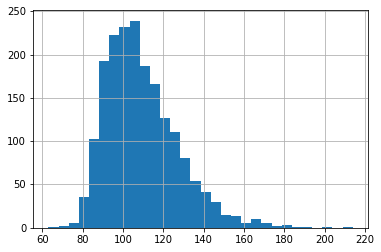

In [21]:
# Вариант 3. Для определения используем метод pandas hist, значение
# определяется на глаз. Точно ответ сказать нельзя

data.runtime.hist(bins=30)

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [22]:
# расчет столбца прибыль ()

data['profit'] = data['revenue'] - data['budget']

In [23]:
# Добавляем шестой ответ к словарю ответов

answers['6'] = '6. Avatar (tt0499549)'

In [24]:
# Вариани 1. Определяются наименование фильма, который самый прибыльный
# на основе среза и функции max()


data[data.profit == data.profit.max()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
239,tt0499549,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,7.1,2009,2544505847


In [25]:
# Вариани 2. На основе сортировки по столбцу profit по убыванию

data.sort_values(by='profit', ascending = False).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
239,tt0499549,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,7.1,2009,2544505847


# 7. Какой фильм самый убыточный? 

In [26]:
# Добавляем седьмой ответ к словарю ответов

answers['7'] = '7. The Lone Ranger (tt1210819)'

In [27]:
# Вариани 1. Определяются наименование фильма, который самый убыточный
# на основе среза и функции min()


data[data.profit == data.profit.min()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,6.0,2013,-165710090


In [28]:
# Вариани 2. На основе сортировки по столбцу profit по возрастанию

data.sort_values(by='profit', ascending = True).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,6.0,2013,-165710090


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [29]:
# Добавляем восьмой ответ к словарю ответов

answers['8'] = '8. 1478'

In [30]:
# Вариант 1. Определяем число фильмов у которых прибыль больше 0 
# с помощью метода len()

len(data[data.profit>0])

1478

In [31]:
# Вариант 2. Определяем число фильмов у которых прибыль больше 0 
# с помощью метода pandas count()

data[data.profit>0]['imdb_id'].count()

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [32]:
# Добавляем девятый ответ к словарю ответов

answers['9'] = '9. The Dark Knight (tt0468569)'

In [33]:
# Выделяем таблицу, содержащие фильмы, выпущенные в 2008

data_2008 = data[data.release_year == 2008]

# определяем фильм который имеет самый кассовый сбор в 2008 
data_2008[(data_2008.revenue == data_2008.revenue.max())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
599,tt0468569,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/2008,8.1,2008,816921825


# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [34]:
# Добавляем десятый ответ к словарю ответов

answers['10'] = '10. The Lone Ranger (tt1210819)'

In [35]:
# находим минимальное значение прибыли за период с 2012-2014 гг

min_2012_2014 = data[(data.release_year >= 2012) & (data.release_year <= 2014)].profit.min()

# находим значение наименование фильма имеющего минимальную прибыль в период
# с 2012-2014 гг.

data[(data.release_year >= 2012) & (data.release_year <= 2014) & (data.profit == min_2012_2014)]



,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,6.0,2013,-165710090


# 11. Какого жанра фильмов больше всего?

In [36]:
# Добавляем одинадцатый ответ к словарю ответов


answers['11'] = '11. Drama'

In [37]:
# Вариант 1. Создаем  словарь Counter

genres = Counter()

#Заполняем словарь

for genre in data.genres.str.split('|'):
    genres += Counter(genre)
    
# сортируем убывающим порядком и выводим информацию на экран

for genre, count in genres.most_common():
    print(genre, count)

Drama 782
Comedy 683
Thriller 596
Action 582
Adventure 415
Crime 315
Romance 308
Family 260
Science Fiction 248
Fantasy 222
Horror 176
Mystery 168
Animation 139
Music 64
History 62
War 58
Western 19
Documentary 8
Foreign 2


In [38]:
# Вариант 2. С помощью функции pandas tolist() возвращаем список значений
# возвращаем изменненный DF и подсчитываем количество жанров

pd.DataFrame(data.genres.str.split('|').tolist()).stack().value_counts()

Drama              782
Comedy             683
Thriller           596
Action             582
Adventure          415
Crime              315
Romance            308
Family             260
Science Fiction    248
Fantasy            222
Horror             176
Mystery            168
Animation          139
Music               64
History             62
War                 58
Western             19
Documentary          8
Foreign              2
dtype: int64

In [39]:
count_list_elements(data, 'genres').most_common()

[('Drama', 782),
 ('Comedy', 683),
 ('Thriller', 596),
 ('Action', 582),
 ('Adventure', 415),
 ('Crime', 315),
 ('Romance', 308),
 ('Family', 260),
 ('Science Fiction', 248),
 ('Fantasy', 222),
 ('Horror', 176),
 ('Mystery', 168),
 ('Animation', 139),
 ('Music', 64),
 ('History', 62),
 ('War', 58),
 ('Western', 19),
 ('Documentary', 8),
 ('Foreign', 2)]

In [40]:
data_genres = data.copy()
data_genres.genres = data.genres.str.split('|')
data_genres = data_genres.explode('genres')
data_genres.genres.value_counts()

Drama              782
Comedy             683
Thriller           596
Action             582
Adventure          415
Crime              315
Romance            308
Family             260
Science Fiction    248
Fantasy            222
Horror             176
Mystery            168
Animation          139
Music               64
History             62
War                 58
Western             19
Documentary          8
Foreign              2
Name: genres, dtype: int64

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [41]:
# Добавляем двенадцатый ответ к словарю ответов


answers['12'] = '12. Drama'

In [42]:
# Вариант 2. Создаем срез и выбираем только прибыльные фильмы
# С помощью функции pandas  tolist() возвращаем список значений
# возвращаем изменненный DF и подсчитываем количество жанров


pd.DataFrame(data[data.profit>0].genres.str.split('|').tolist()).stack().value_counts()

Drama              560
Comedy             551
Thriller           446
Action             444
Adventure          337
Romance            242
Crime              231
Family             226
Science Fiction    195
Fantasy            188
Horror             150
Animation          120
Mystery            119
Music               47
History             46
War                 41
Western             12
Documentary          7
dtype: int64

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [43]:
# Добавляем тринадцатый ответ к словарю ответов


answers['13'] = '13. Peter Jackson'

In [44]:
# Вариант 1. 

# Групируем данные по столбцу директор и суммируем выручку 

data_director_revenue = data.groupby('director').agg({'revenue':'sum'}).reset_index()


# сколько директоров в каждой строчке

data_director_revenue['diretor_count'] = data_director_revenue['director'].apply(lambda x: len(x.split('|')))


# выделяем выделяем отдельный DF, где два и более директора

data_dubldiretor_revenue = data_director_revenue[data_director_revenue.diretor_count>1].copy()


# удалаяем из DF, где 2 и более директора из data_director_revenue

data_director_revenue = data_director_revenue.drop(data_dubldiretor_revenue.index)


# Создаем список режисеров, который мы однозначно можем идентифицировать, 
# как снявших картину единолично

dict_director =list(data_director_revenue.director)


# определяем последний индекс в data_director_revenue

last_index_data_director_revenue = data_director_revenue.tail(1).index[0]



In [45]:
# Дополняем data_director_revenue и добовляем суммы к существующим режисерам и 
# добовляем режисеров, которые в одиночку не снимали

for index in data_dubldiretor_revenue.index:
    for name in data_dubldiretor_revenue.loc[index]['director'].split('|'):
        if dict_director.count(name) > 0:
            revenue = data_director_revenue.loc[data_director_revenue[data_director_revenue.director == name].index[0]]['revenue']
            data_director_revenue.loc[data_director_revenue.director == name]['revenue'] = revenue + data_dubldiretor_revenue.loc[index]['revenue']
        else:
            last_index_data_director_revenue += 1
            data_director_revenue.loc[last_index_data_director_revenue] = [name, data_dubldiretor_revenue.loc[index]['revenue'], 1]  
            dict_director.append(name)
            
data_director_revenue.sort_values(by='revenue', ascending = False).head(1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,director,revenue,diretor_count
689,Peter Jackson,6490593685,1


In [46]:
# Вариант 2

# Создаем словарь с режисер и доходом

director_revenue = {}


# создаем список режисеров

directors = pd.DataFrame(data.director.str.split('|').tolist()).stack().value_counts().index

# Заполняем словарь актеров с доходами

for director in directors:
    data_tmp = data[data['director'].map(lambda x: True if director in x else False)]
    director_revenue[director] = data_tmp.revenue.sum()

df_director = ['Steven Spielberg', 'Christopher Nolan', 'David Yates', 'James Cameron', 'Peter Jackson']

for director in df_director:
    print(director, director_revenue[director])

Steven Spielberg 3386700791
Christopher Nolan 4167548502
David Yates 4154295625
James Cameron 2798546718
Peter Jackson 6490593685


# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [47]:
# Добавляем четырнадцатый ответ к словарю ответов


answers['14'] = '14. Robert Rodriguez'

In [48]:
# Создаем копию таблицы

data_action = data.copy()


# Выделем столбец где в жанре фильма упоменается жанр Action

data_action['Action'] = data_action.genres.apply(lambda x: x.split('|').count('Action'))


# Групируем режисеров, которые снимали в жанре Action

pd.DataFrame(data_action[data_action.Action > 0].director.str.split('|').tolist()).stack().value_counts().head(1)

Robert Rodriguez    9
dtype: int64

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [49]:
# Добавляем пятнадцатый ответ к словарю ответов

answers['15'] = '15. Chris Hemsworth'

In [50]:
# Создаем словарь с актерами и доходом

cast_revenue = {}


# создаем список актеров

cast = pd.DataFrame(data.cast.str.split('|').tolist()).stack().value_counts().index

# Заполняем словарь актеров с доходами

for actor in cast:
    data_tmp = data[data['cast'].map(lambda x: True if actor in x else False)]
    cast_revenue[actor] = data_tmp.revenue.sum()


df_actcor = ['Nicolas Cage', 'Tom Hardy', 'Chris Hemsworth', 'Jim Sturgess', 'Emma Stone']

for actor in df_actcor:
    print(actor, cast_revenue[actor])

Nicolas Cage 3243647930
Tom Hardy 2943641063
Chris Hemsworth 4685424695
Jim Sturgess 307406097
Emma Stone 2885212916


# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [51]:
# Добавляем шестнадцатый ответ к словарю ответов

answers['16'] = '16. Matt Damon'

In [52]:
data_high_budget = data[data.budget > data.budget.mean()].copy()
pd.DataFrame(data_high_budget.cast.str.split('|').tolist()).stack().value_counts()

Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Samuel L. Jackson    15
Eddie Murphy         15
                     ..
Venus Schultheis      1
Joe Pantoliano        1
Will Rothhaar         1
Odeya Rush            1
Scott Porter          1
Length: 1505, dtype: int64

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [53]:
# Добавляем семнадцатый ответ к словарю ответов

answers['17'] = '17. Action'

In [54]:
# Вариант 1. Создаем таблицу фильмов, в которых снялся 

data_nicolas_cage = data[data['cast'].map(lambda x: True if 'Nicolas Cage' in x else False)]


# Определяем количество фильмов, выпущенных в разных жанрах

pd.DataFrame(data_nicolas_cage.genres.str.split('|').tolist()).stack().value_counts()

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Animation           3
Mystery             3
Family              3
History             2
Horror              1
War                 1
Romance             1
dtype: int64

In [55]:
# Делаем копию таблицы

data_nicolas_cage = data.copy()


# Определяем метку в каком фильме снимался или не снимался Николос Кейдж

data_nicolas_cage['Nicolas_Cage'] = data_nicolas_cage.cast.apply(lambda x: x.split('|').count('Nicolas Cage'))


# Определяем количество фильмов, выпущенных в разных жанрах

pd.DataFrame(data_nicolas_cage[data_nicolas_cage.Nicolas_Cage > 0].genres.str.split('|').tolist()).stack().value_counts()

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Animation           3
Mystery             3
Family              3
History             2
Horror              1
War                 1
Romance             1
dtype: int64

# 18. Самый убыточный фильм от Paramount Pictures

In [56]:
# Добавляем восемнадцатый ответ к словарю ответов

answers['18'] = '18. K-19: The Widowmaker (tt0267626)'

In [57]:
# Создание копии таблицы

data_paramount = data.copy()


# Определяем метку фильмов Paramount Pictures

data_paramount['paramount'] = data_paramount.production_companies.apply(lambda x: x.split('|').count('Paramount Pictures'))


# Выбираем самый убыточный фильм компании Paramount Pictures

data_paramount[(data_paramount.paramount > 0)].sort_values(by='profit').head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit,paramount
925,tt0267626,100000000,35168966,K-19: The Widowmaker,Harrison Ford|Liam Neeson|Peter Sarsgaard|Joss...,Kathryn Bigelow,Fate has found its hero.,When Russia's first nuclear submarine malfunct...,138,Thriller|Drama|History,Paramount Pictures|Intermedia Films|National G...,7/19/2002,6.0,2002,-64831034,1


# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [58]:
# Добавляем девятнадцатый ответ к словарю ответов

answers['19'] = '19. 2015'

In [59]:
# Определяем самый умпешный год по сборам

data.groupby('release_year').agg({'revenue': 'sum'}).reset_index().sort_values(by = 'revenue', ascending = False).head(1)

,release_year,revenue
15,2015,25449202382


# 20. Какой самый прибыльный год для студии Warner Bros?

In [60]:
# Добавляем двадцатый ответ к словарю ответов 

answers['20'] = '20. 2014'

In [61]:
# создаем временную таблицу содержащие данные о фильмах кинокомпании Warner Bros

data_tmp = data[data['production_companies'].map(lambda x: True if 'Warner Bros' in x else False)]


# Определяем сумму выручки кинокомпании Warner Bros по годам 

data_tmp.groupby('release_year').agg({'profit': 'sum'}).sort_values(by = 'profit', ascending = False)

,profit
release_year,
2014,2295464519
2007,2201675217
2008,2134595031
2010,1974712985
2011,1871393682
2003,1855493377
2009,1822454136
2013,1636453400
2004,1631933725


# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [62]:
# Добавляем двадцать первый ответ к словарю ответов 

answers['21'] = '21. сентябрь'

In [63]:
# Переводим данные столбца release_date в формат datetime

data['release_date'] = pd.to_datetime(data['release_date'])


# Выделяем месяц из даты

data['month'] = data['release_date'].dt.month


# Группируем данные по количесву фильмов 
# в разрезе месяцев и сортируем их по убыванию

data_month = data.groupby('month').agg({'release_date': 'count'}).reset_index().sort_values(by = 'release_date', ascending = False)

data_month

,month,release_date
8,9,227
11,12,190
9,10,186
7,8,161
2,3,156
3,4,149
5,6,147
10,11,146
6,7,142
4,5,140


# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [64]:
# Добавляем двадцать второй ответ к словарю ответов 

answers['22'] = '22. 450'

In [65]:
# Выбираем вильиы, которые вышли летом и считаем их количество

data_month[(data_month['month'] > 5) & (data_month['month'] < 9)]['release_date'].sum()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [66]:
# Добавляем двадцать третий ответ к словарю ответов 

answers['23'] = '23. Peter Jackson'

In [67]:
# Выбираем фильмы которые вышли зимой

data_winter = data[(data['month'] > 11) | (data['month'] < 3)].copy()


# определеяем режисеров и количесво выпущенных ими фильмов зимой 


pd.DataFrame(data_winter.director.str.split('|').tolist()).stack().value_counts()

Peter Jackson         7
Clint Eastwood        6
Steven Soderbergh     6
Shawn Levy            4
Nancy Meyers          4
                     ..
Charles Stone III     1
Scott Derrickson      1
James Duffy           1
Francine McDougall    1
Steve Trenbirth       1
Length: 358, dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [68]:
# Добавляем двадцать чпетвертый ответ к словарю ответов 

answers['24'] = '24. Four By Two Productions'

In [69]:
# делаем копию DF с фильмами 

data_name_movie = data.copy()


# Считаем длину названия фильма

data_name_movie['name_length'] = data_name_movie.original_title.str.len()


# Создаем список с компаний 

production_companies = pd.DataFrame(data_name_movie.production_companies.str.split('|').tolist())


# Объединяем таблицы data_name_movie и production_companies методом join

data_name_movie = data_name_movie.join(production_companies)


# Создаем таблицу словарь с наименованием компаний

production_companies = pd.DataFrame(data.production_companies.str.split('|').tolist()).stack().unique()
production_companies = dict.fromkeys(production_companies) 


# Заполняем словарь нулевыми значениями

for name in production_companies:
    production_companies[name] = 0


    
# Заполняем по по общей длине названий 
    
    
for row in data_name_movie.index:
    name_length = data_name_movie.loc[row]['name_length']
    company_0 = data_name_movie.loc[row][0]
    all_length = production_companies[company_0]
    production_companies[company_0] = all_length + name_length
    company_1 = data_name_movie.loc[row][1]
    if company_1 == None:
        continue
    else:
        all_length = production_companies[company_1]
        production_companies[company_1] = all_length + name_length
    company_2 = data_name_movie.loc[row][2]
    if company_2 == None:
        continue
    else:
        all_length = production_companies[company_2]
        production_companies[company_2] = all_length + name_length
    company_3 = data_name_movie.loc[row][3]
    if company_3 == None:
        continue
    else:
        all_length = production_companies[company_3]
        production_companies[company_3] = all_length + name_length
    company_4 = data_name_movie.loc[row][4]
    if company_4 == None:
        continue
    else:
        all_length = production_companies[company_4]
        production_companies[company_4] = all_length + name_length

# Словарь production_companies назначаем объектом Series

production_companies = pd.Series(production_companies)


In [70]:
# Расчитаем количество фильмов в разрезе компаний 

production_companies_count = pd.DataFrame(data_name_movie.production_companies.str.split('|').tolist()).stack().value_counts()
production_companies_count = pd. Series(production_companies_count)

In [71]:
# Сортируем таблицы по индексам

production_companies = production_companies.sort_index()
production_companies_count = production_companies_count.sort_index()


# Объединяем таблицы и переназываем столбцы

result = pd.concat([production_companies, production_companies_count], axis=1, sort=False).reset_index()
result.columns = ['production_companies', 'all_length', 'all_number_film']


# Рассчитываем среднее значение длины названия фильма и выводим результата

result['mean_length'] = result['all_length']/result['all_number_film']
result.sort_values(by='mean_length')



,production_companies,all_length,all_number_film,mean_length
624,Global Entertainment Group,2,1,2.0
803,Ixtlan Productions,2,1,2.0
1748,XM2 Productions,2,1,2.0
169,Berlanti Productions,3,1,3.0
512,Everest Entertainment,3,1,3.0
...,...,...,...,...
1258,Polsky Films,46,1,46.0
1094,Museum Canada Productions,46,1,46.0
446,Dos Corazones,47,1,47.0
817,"Jim Henson Company, The",59,1,59.0


# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [72]:
# Добавляем двадцать пятый ответ к словарю ответов 

answers['25'] = '25. Midnight Picture Show'

In [73]:
# Рассчитаем длину описания фильмов 

data_name_movie['overview_length'] = data_name_movie.overview.apply(lambda x: len(x))

In [74]:
# Создаем словарь 

production_companies_overview_length = {}


# создаем список режисеров

production_companies = pd.DataFrame(data.production_companies.str.split('|').tolist()).stack().value_counts().index

# Заполняем словарь компаний и средних значений длины фильмов 

for production_company in production_companies:
    data_tmp = data_name_movie[data_name_movie['production_companies'].map(lambda x: True if production_company in x else False)]
    production_companies_overview_length[production_company] = data_tmp.overview_length.mean()

df_production_company = ['Universal Pictures', 'Warner Bros.', 'Midnight Picture Show', 'Paramount Pictures', 'Total Entertainment']

for production_company in df_production_company:
    print(production_company, production_companies_overview_length[production_company])

Universal Pictures 315.46285714285716
Warner Bros. 318.2568306010929
Midnight Picture Show 1000.0
Paramount Pictures 323.3114754098361
Total Entertainment 526.0


# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 


In [75]:
# Добавляем двадцать шестой ответ к словарю ответов 

answers['26'] = '26. Inside Out, The Dark Knight, 12 Years a Slave'

In [76]:
# Составляем список фильмов входящих в 1% лучших по рейтингу 


top_movies = data[data['vote_average']>data.quantile(0.99, numeric_only=True)['vote_average']]

In [77]:
# Составляем словарь ответов, которые необходимо проверить

choose_movies = {1: ['Inside Out', 'The Dark Knight', '12 Years a Slave'],
                2: ['BloodRayne', 'The Adventures of Rocky', 'Bullwinkle'],
                3: ['Batman Begins', 'The Lord of the Rings: The Return of the King', 'Upside Down'],
                4: ['300', 'Lucky Number Slevin', 'Kill Bill: Vol. 1'],
                5: ['Upside Down', 'Inside Out', 'Iron Man']}

In [78]:
# Проверяем ответы на вхождение группы фильмов 

for answer in choose_movies:
    count = 0
    for movie in choose_movies[answer]:
        if len(top_movies[top_movies.original_title == movie].original_title)>0:
            count += 1
    if count == 3:
        print(answer)

1


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [79]:
# Добавляем двадцать седьмой ответ к словарю ответов 

answers['27'] = '27. Daniel Radcliffe, Rupert Grint'

In [ ]:
from itertools import combinations


# Саздаем словарь типа Counter, где будут содержаться данные о парах актеров

actors = Counter()


# Заполняем данные контенера используя combinations()

for x in data.cast.str.split('|'):
    actors += Counter(combinations(x, 2))
    
    
# Выводим сортированные данные контенера 


for actor, count in actors.most_common():
    print(actor, count)

('Daniel Radcliffe', 'Rupert Grint') 8
('Daniel Radcliffe', 'Emma Watson') 8
('Rupert Grint', 'Emma Watson') 7
('Ben Stiller', 'Owen Wilson') 6
('Johnny Depp', 'Helena Bonham Carter') 6
('Adam Sandler', 'Kevin James') 5
('Hugh Jackman', 'Ian McKellen') 5
('Kristen Stewart', 'Robert Pattinson') 5
('Kristen Stewart', 'Taylor Lautner') 5
('Robert Pattinson', 'Taylor Lautner') 5
('Jennifer Lawrence', 'Josh Hutcherson') 4
('Jennifer Lawrence', 'Liam Hemsworth') 4
('Jennifer Lawrence', 'Woody Harrelson') 4
('Josh Hutcherson', 'Liam Hemsworth') 4
('Josh Hutcherson', 'Woody Harrelson') 4
('Liam Hemsworth', 'Woody Harrelson') 4
('Tobin Bell', 'Costas Mandylor') 4
('Tobin Bell', 'Betsy Russell') 4
('Costas Mandylor', 'Betsy Russell') 4
('Vin Diesel', 'Jordana Brewster') 4
('Paul Walker', 'Jordana Brewster') 4
('Mike Myers', 'Eddie Murphy') 4
('Mike Myers', 'Cameron Diaz') 4
('Eddie Murphy', 'Cameron Diaz') 4
('Kristen Stewart', 'Peter Facinelli') 4
('Robert Pattinson', 'Peter Facinelli') 4
('Tay

('Aaron Taylor-Johnson', 'Elizabeth Olsen') 1
('Aaron Taylor-Johnson', 'Bryan Cranston') 1
('Aaron Taylor-Johnson', 'Juliette Binoche') 1
('Ken Watanabe', 'Elizabeth Olsen') 1
('Ken Watanabe', 'Bryan Cranston') 1
('Ken Watanabe', 'Juliette Binoche') 1
('Elizabeth Olsen', 'Bryan Cranston') 1
('Elizabeth Olsen', 'Juliette Binoche') 1
('Bryan Cranston', 'Juliette Binoche') 1
('Angelina Jolie', 'Elle Fanning') 1
('Angelina Jolie', 'Juno Temple') 1
('Angelina Jolie', 'Sharlto Copley') 1
('Angelina Jolie', 'Isobelle Molloy') 1
('Elle Fanning', 'Juno Temple') 1
('Elle Fanning', 'Sharlto Copley') 1
('Elle Fanning', 'Isobelle Molloy') 1
('Juno Temple', 'Sharlto Copley') 1
('Juno Temple', 'Isobelle Molloy') 1
('Sharlto Copley', 'Isobelle Molloy') 1
('Pierce Brosnan', 'Luke Bracey') 1
('Pierce Brosnan', 'Olga Kurylenko') 1
('Pierce Brosnan', 'Bill Smitrovich') 1
('Pierce Brosnan', 'Amila Terzimehic') 1
('Luke Bracey', 'Olga Kurylenko') 1
('Luke Bracey', 'Bill Smitrovich') 1
('Luke Bracey', 'Amila

('Rain', 'Sung Kang') 1
('Rain', 'Randall Duk Kim') 1
('Rain', 'Rick Yune') 1
('Naomie Harris', 'Sung Kang') 1
('Naomie Harris', 'Randall Duk Kim') 1
('Naomie Harris', 'Rick Yune') 1
('Sung Kang', 'Randall Duk Kim') 1
('Sung Kang', 'Rick Yune') 1
('Randall Duk Kim', 'Rick Yune') 1
('Vanessa Hudgens', 'Aly Michalka') 1
('Vanessa Hudgens', 'Gaelan Connell') 1
('Vanessa Hudgens', 'Lisa Kudrow') 1
('Vanessa Hudgens', 'Scott Porter') 1
('Aly Michalka', 'Gaelan Connell') 1
('Aly Michalka', 'Lisa Kudrow') 1
('Aly Michalka', 'Scott Porter') 1
('Gaelan Connell', 'Lisa Kudrow') 1
('Gaelan Connell', 'Scott Porter') 1
('Lisa Kudrow', 'Scott Porter') 1
('Meryl Streep', 'Alec Baldwin') 1
('Meryl Streep', 'Steve Martin') 1
('Meryl Streep', 'Lake Bell') 1
('Meryl Streep', 'Mary Kay Place') 1
('Alec Baldwin', 'Steve Martin') 1
('Alec Baldwin', 'Lake Bell') 1
('Alec Baldwin', 'Mary Kay Place') 1
('Steve Martin', 'Lake Bell') 1
('Steve Martin', 'Mary Kay Place') 1
('Lake Bell', 'Mary Kay Place') 1
('Will

# Submission

In [ ]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

In [ ]:
# и убедиться что ни чего не пропустил)
len(answers)